IRIS FLOWER CLASSIFICATION 

Beginner task 1

DNYANADA PRAVIN  BHOSALE

# IMPORT REQUIRED LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn import metrics

# READING DATASET

In [3]:
os.chdir('C:/Users/pk/OneDrive/Desktop/LGM DataScience')


In [4]:
df=pd.read_csv('Iris.csv')

In [5]:
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

# PREPROCESS THE DATA

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.size

900

In [8]:
df.shape

(150, 6)

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [12]:
df.isnull().sum() #To check null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# VISUALIZATION OF DATASET USING SEABORN LIBRARY

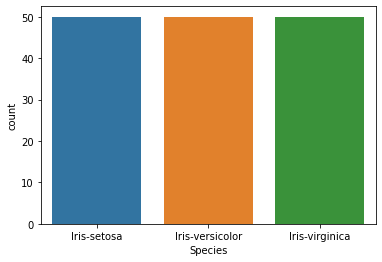

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Species",data=df)
plt.show()


<AxesSubplot:>

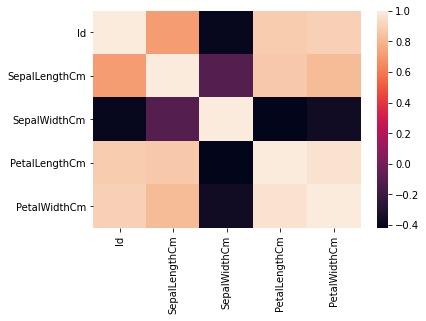

In [14]:
#Heatmap showing correlation among different columns
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

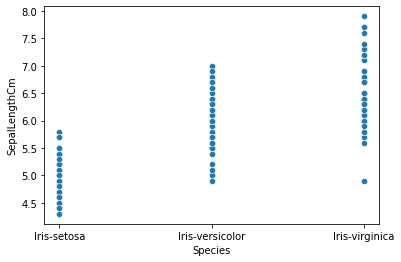

In [15]:
sns.scatterplot(data=df,x="Species",y="SepalLengthCm",palette='pastel')

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

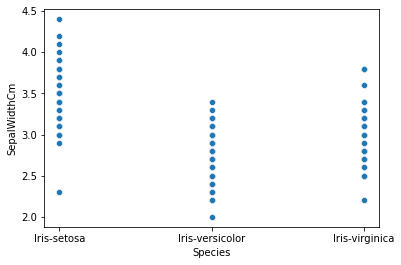

In [16]:
sns.scatterplot(data=df,x="Species",y="SepalWidthCm",palette='pastel')

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

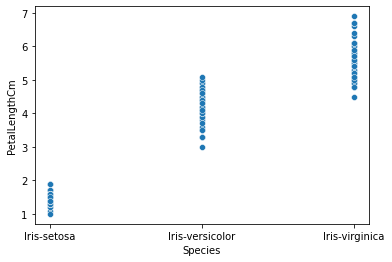

In [17]:
sns.scatterplot(data=df,x="Species",y="PetalLengthCm")

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

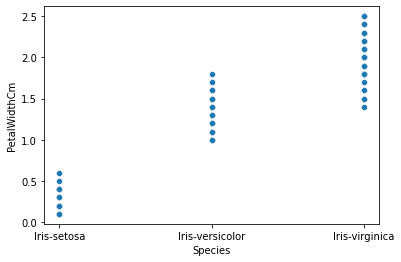

In [18]:
sns.scatterplot(data=df,x="Species",y="PetalWidthCm")

In [39]:
df=df.drop(['Species'], axis=1)

# KMEANS IMPLEMENTION 

# Preprocess the data

In [40]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler() # sc is an object of StandardScaler
df_scaled=sc.fit_transform(df) # df_scaled is our new data frame which will contain normally distributed data.

In [41]:
df_scaled # Normally distributed data lies within positive, negative 0 to 1

array([[-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.24957601e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.37848329e-01,
        -1.39813811e+00, -1.31297673e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.06445364e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.26346019e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.60506942e+00, -5.37177559e-01,  1.95766909e+00,
        -1.17067529e+00, -1.05003079e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.00654259e-01,
        -1.34127240e+00, -1.18150376e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.00654259e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.56360566e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.51269132e+00, -1.14301691e+00,  1.06445364e-01,
        -1.28440670e+00

# Train the model

In [42]:
from sklearn.cluster import KMeans

# For finding out number of clusters

In [43]:

ssq=[] # Sum of squared distance between members of clusters and its centroid

for K in range(1,11):
    my_model=KMeans(n_clusters=K,random_state=123)
    result=my_model.fit(df_scaled)
    ssq.append(my_model.inertia_)
    

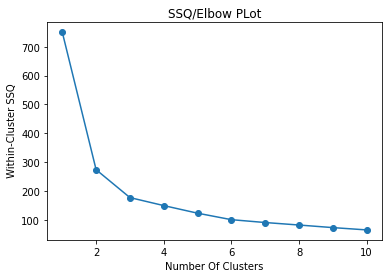

In [44]:
plt.plot(range(1,11),ssq,marker='o')
plt.xlabel("Number Of Clusters")
plt.ylabel(" Within-Cluster SSQ")
plt.title("SSQ/Elbow PLot")
plt.show()

In [45]:
my_model=KMeans(n_clusters=3,random_state=123)

In [46]:
result=my_model.fit(df_scaled)

# Test the model

In [47]:
predictions = result.predict(df_scaled)

In [48]:
pd.DataFrame(df).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


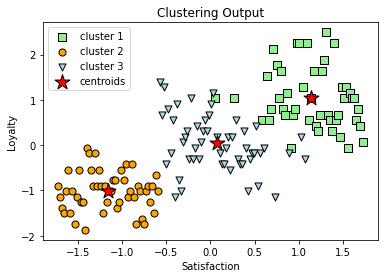

In [49]:
# cluster,column0                #cluster,column1     #s=size,c=color
plt.scatter(df_scaled[predictions==0,0], df_scaled[predictions==0, 1], s=50, c='lightgreen',\
           marker='s', edgecolors='black', label='cluster 1')
plt.scatter(df_scaled[predictions==1,0], df_scaled[predictions==1, 1], s=50, c='orange',\
           marker='o', edgecolors='black', label='cluster 2')
plt.scatter(df_scaled[predictions==2,0], df_scaled[predictions==2, 1], s=50, c='lightblue',\
           marker='v', edgecolors='black', label='cluster 3')
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s=250, c='red',\
           marker='*', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1) # it will show symbols i.e.square, triangle,circle 1 time
plt.xlabel("Satisfaction") # on x axis we have Satisfaction
plt.ylabel("Loyalty") #on y axis we have Loyalty
plt.title("Clustering Output")
plt.show()


# Co-relation Matrix

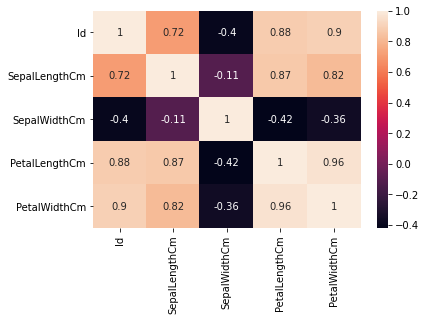

In [50]:
sns.heatmap(df.corr(),annot=True)
plt.show()